In [5]:
from limits import LimitFigure
import rnog as rnog

38.0
277.33333333333337
5.564383561643836
array([ 3.162e+07,  1.000e+08,  3.162e+08,  1.000e+09,  3.162e+09,
        1.000e+10,  3.162e+10,  1.000e+11])
array([ 6.792e-06,  1.409e-06,  5.108e-07,  2.584e-07,  1.814e-07,
        1.619e-07,  1.325e-07,  1.691e-07])
-------
array([ 3.162e+07,  1.000e+08,  3.162e+08,  1.000e+09,  3.162e+09,
        1.000e+10,  3.162e+10,  1.000e+11])
array([ 1.380e-07,  4.183e-08,  2.154e-08,  1.402e-08,  1.107e-08,
        1.144e-08,  1.137e-08,  1.486e-08])
-------
array([ 3.162e+07,  1.000e+08,  3.162e+08,  1.000e+09,  3.162e+09,
        1.000e+10,  3.162e+10,  1.000e+11])
array([ 1.677e-08,  5.212e-09,  2.772e-09,  1.873e-09,  1.505e-09,
        1.583e-09,  1.614e-09,  2.129e-09])


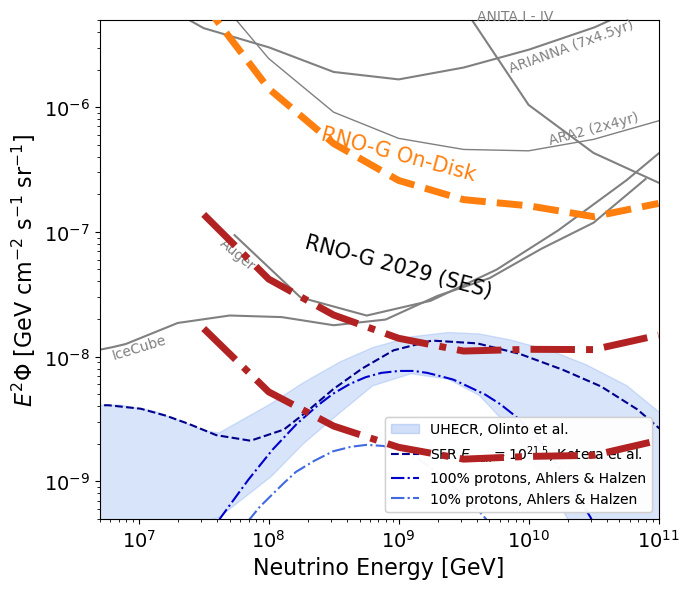

In [3]:
# load in all the volumes

energies = rnog.veff["wp"]["energy"]

veff_hilo = rnog.veff["deep_high_low_1Hz"]["veff"]

veff_didaq_2sig = rnog.veff["simple_threshold_2"]["veff"]
veff_didaq_25sig = rnog.veff["simple_threshold_2.5"]["veff"]

veff_pa_25sig = rnog.veff["simple_threshold_2.5_downsampled"]["veff"]
veff_pa_3sig = rnog.veff["simple_threshold_3_downsampled"]["veff"]

# July 2024-2025: 8 years of hilo
# July 2025-2026: 8 years of PA (add no stations)
# July 2026-2027: 8 years of PA + 5 years of DiDAQ (add 5 DiDAQ stations)
# July 2027-2028: 8 years of PA + 11 years of DiDAQ (add 6 DiDAQ stations)
# July 2028-2029: 8 years of PA + 17 years of DiDAQ (add 6 DiDAQ stations)
# July 2029-2030: 8 years of PA + 23 years of DiDAQ (ad 6 DiDAQ stations)
# July 2020-2031: 8 years of PA + 27 years of DiDAQ (add 4 DiDAQ stations, completing the array)
# July 2031-2040: 9 x (8 PA + 27 DiDAQ) -- run the array for another decade


uptime = 2/3
more_pa = (32) * 1/2 # 50% uptime
more_didaq = (5 + 11 + 17) * 2/3 # 2/3 uptime
print(more_pa + more_didaq)

more_pa_2040 = ((6*8) + (9*8))*1/2
more_didaq_2040 = ((5+11+17+23+27) + (9*27)) * 2/3
print(more_pa_2040 + more_didaq_2040)

existing_livetime = rnog.existing_livetime
print(existing_livetime)

# today
exposure_today = existing_livetime * veff_hilo

# pessimism
# for the PA, we only get to 3 sigma
# for the DiDAQ, we only get to 2.5 sigma
exposure_pessimistic = (existing_livetime * veff_hilo) + (more_pa * veff_pa_3sig) + (more_didaq * veff_didaq_25sig)

# optimism
# for the PA, we get to 2.5 sigma
# for the DiDAQ, we get to 2 sigma
exposure_optimistic = (existing_livetime * veff_hilo) + (more_pa * veff_pa_25sig) + (more_didaq * veff_didaq_2sig)

exposure_2040 = (existing_livetime * veff_hilo) + (more_pa_2040 * veff_pa_25sig) + (more_didaq_2040 * veff_didaq_2sig)


figure = LimitFigure(e_power=2, xlims=(5e6, 1e11), ylims=(0.5e-9, 0.5e-5), font_size=16, tick_size=14)    
figure.build_base_plot('rnog_proposal')

energies, limits = figure.add_limit(name='RNOG', energies=energies,
    veffs=exposure_today, stations=1, years=1, sup=1,
    color='C1',linestyle='--', label='RNO-G on-disk')

import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3e}'.format})
energies = np.asarray(energies)
limits = np.asarray(limits)
print(repr(energies))
print(repr(limits))
print('-------')

energies, limits = figure.add_limit(name='RNOG', energies=energies,
    veffs=exposure_optimistic, stations=1, years=1, sup=1,
    color='firebrick',linestyle='-.', label='RNO-G 2029')

energies = np.asarray(energies)
limits = np.asarray(limits)
print(repr(energies))
print(repr(limits))
print('-------')

energies, limits = figure.add_limit(name='RNOG', energies=energies,
    veffs=exposure_2040, stations=1, years=1, sup=1,
    color='firebrick',linestyle='-.', label='RNO-G 2040')

energies = np.asarray(energies)
limits = np.asarray(limits)
print(repr(energies))
print(repr(limits))

figure.ax.annotate('RNO-G On-Disk',
                    xy=(1e9, 2.6E-7), xycoords='data',
                    horizontalalignment='center', color='C1', rotation=-15, fontsize=15)

figure.ax.annotate('RNO-G 2029 (SES)',
                    xy=(1e9, 3E-8), xycoords='data',
                    horizontalalignment='center', color='black', rotation=-15, fontsize=15)




figure.show(legend_size=10, save_name='limit_E2FE.png',dpi=300)

# print('Energies {} in GeV'.format(energies))
# print('Limit {} in GeV/cm2/s/sr'.format(limits))